In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.utils.visualization import plot_histogram
from src.utils.eda_utils import show_missing_values

In [2]:
df = pd.read_csv('../data/raw/energy_consumption_dataset.csv')
df.head()

,Building_ID,Building_Type,Square_Footage,Age_of_Building,Occupancy_Count,Date,Day_of_Week,Month,Time_of_Day,Outdoor_Temperature,HVAC_Usage,Appliance_Usage,Holiday_Flag,Renewable_Energy_%,Weather_Condition,Energy_Consumption_kWh,Anomaly_Flag,Peak_Usage_Flag,Temp_vs_Consumption_Ratio,Building_Size_Category
0,125,Residential,2882.727120,1,4.0,2023-08-22,Tuesday,August,Evening,79.102869,High,1,0,18.0,Sunny,250.69,0,1,3.169164,Medium
1,36,Residential,2397.797732,9,3.0,2023-05-22,Monday,May,Evening,NaN,Low,1,0,10.0,Cloudy,89.96,0,0,NaN,Medium
2,2,Residential,1930.867849,21,5.0,2023-05-25,Thursday,May,Evening,59.906903,Low,1,0,9.0,Cloudy,87.20,0,0,1.455592,Medium
3,229,Commercial,6696.244285,3,35.0,2023-10-03,Tuesday,October,Day,74.880985,Medium,1,0,0.0,Sunny,377.27,0,0,5.038262,Large
4,97,Commercial,11818.388089,35,16.0,2023-12-24,Sunday,December,Day,35.136324,High,1,0,0.0,Cloudy,397.68,0,0,11.318202,Very Large


In [3]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Building_ID                     0
Building_Type                   0
Square_Footage                  0
Age_of_Building                 0
Occupancy_Count              1000
Date                            0
Day_of_Week                     0
Month                           0
Time_of_Day                     0
Outdoor_Temperature           446
HVAC_Usage                      0
Appliance_Usage                 0
Holiday_Flag                    0
Renewable_Energy_%             73
Weather_Condition               0
Energy_Consumption_kWh          0
Anomaly_Flag                    0
Peak_Usage_Flag                 0
Temp_vs_Consumption_Ratio     446
Building_Size_Category          0
dtype: int64


In [4]:
## Analysing Occupancy Count
print("Datatype of Occupancy Count: ",df['Occupancy_Count'].dtype)

Datatype of Occupancy Count:  float64


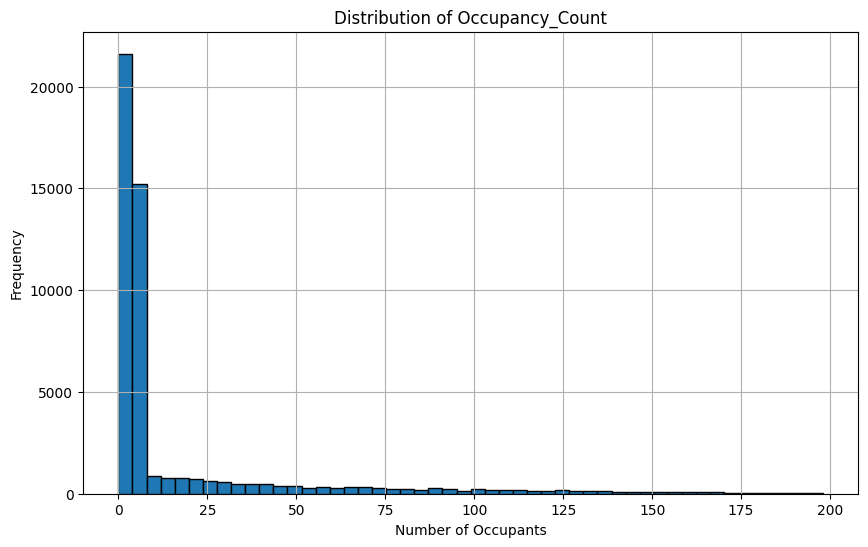

In [5]:
# histogram for the Occupancy Count
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Occupancy_Count'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Occupancy_Count')
plt.xlabel('Number of Occupants')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
# finding number if building where 0 people are present 
count_zeros = (df['Occupancy_Count'] == 0).sum()
print(count_zeros) 

1006


In [7]:
""" now we will try to understand whether these 0s are true values means no people are there in the building ,
or these are jsut placeholders for nan values means they are jsut NAN values and dont represent correct 0 value."""

# Check if 0s correlate with other features (e.g., HVAC usage)
zero_occupancy = df[df['Occupancy_Count'] == 0]
print(zero_occupancy[['Building_Type', 'HVAC_Usage', 'Energy_Consumption_kWh']].describe())

       Energy_Consumption_kWh
count             1006.000000
mean                59.091843
std                 32.828831
min                  5.181175
25%                 35.180000
50%                 50.955000
75%                 78.072500
max                354.128723


In [9]:
 #Replace all illogical 0s with NaN
df.loc[(df['Occupancy_Count'] == 0) & (df['Energy_Consumption_kWh'] > 0), 'Occupancy_Count'] = np.nan

In [10]:
print(f"Missing values after correction: {df['Occupancy_Count'].isnull().sum()}")

Missing values after correction: 2006


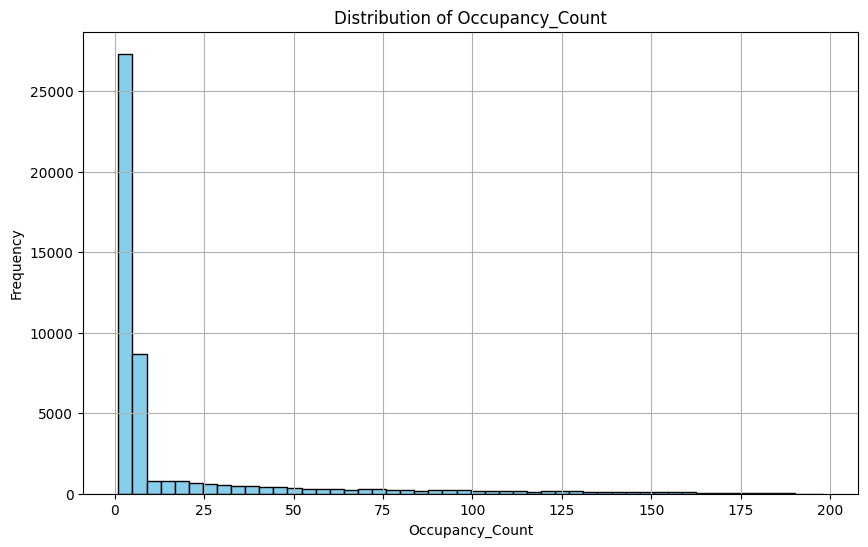

In [12]:
plot_histogram(df,"Occupancy_Count");

In [13]:
# skewness of the Occupancy Count
skewness = df['Occupancy_Count'].skew()
print(f"Skewness: {skewness:.2f}")

Skewness: 2.68


In [14]:
# as the skewness is postive it is right skewed , it was evident from the graph itself

In [16]:
# As we know that mean is not the correct choice for the imputation here as the data is very skewed ,so we will use median imputation, 
# but the thing is both commercial and residential buildings have different Ocuuoancy Counts, so we will use Median grouped by Building type

In [17]:
df['Building_Type'].head()

0    Residential
1    Residential
2    Residential
3     Commercial
4     Commercial
Name: Building_Type, dtype: object

In [18]:
df['Building_Type'].unique()

array(['Residential', 'Commercial'], dtype=object)

In [19]:
# Grouped median imputation (best for right-skewed data)
df['Occupancy_Count'] = df.groupby('Building_Type')['Occupancy_Count'].transform(
    lambda x: x.fillna(x.median())
)

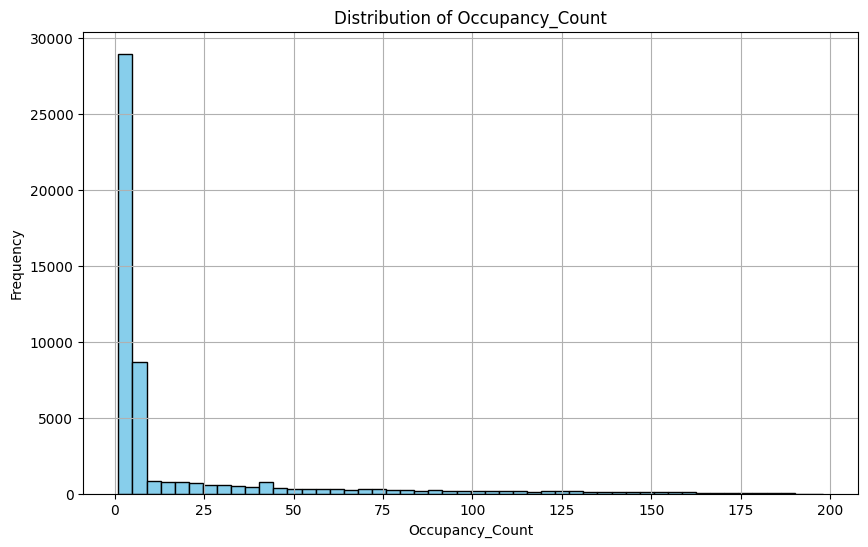

In [21]:
plot_histogram(df,'Occupancy_Count');

In [22]:
df['Occupancy_Count'].isnull().sum()

0

In [23]:
# now there are no null values in the Occupancy_Count column

In [25]:
from src.utils.eda_utils import show_missing_values
show_missing_values(df, show_percentage=True)

MISSING VALUES ANALYSIS
                           Missing Count  Missing (%)
Building_ID                            0         0.00
Building_Type                          0         0.00
Square_Footage                         0         0.00
Age_of_Building                        0         0.00
Occupancy_Count                        0         0.00
Date                                   0         0.00
Day_of_Week                            0         0.00
Month                                  0         0.00
Time_of_Day                            0         0.00
Outdoor_Temperature                  446         0.89
HVAC_Usage                             0         0.00
Appliance_Usage                        0         0.00
Holiday_Flag                           0         0.00
Renewable_Energy_%                    73         0.15
Weather_Condition                      0         0.00
Energy_Consumption_kWh                 0         0.00
Anomaly_Flag                           0         0.00
Peak

In [26]:
# only Outdoor Temperature and Temp_vs_Consumption Ratio are the columns in which null values are present 

In [27]:
df['Outdoor_Temperature'].dtype

dtype('float64')

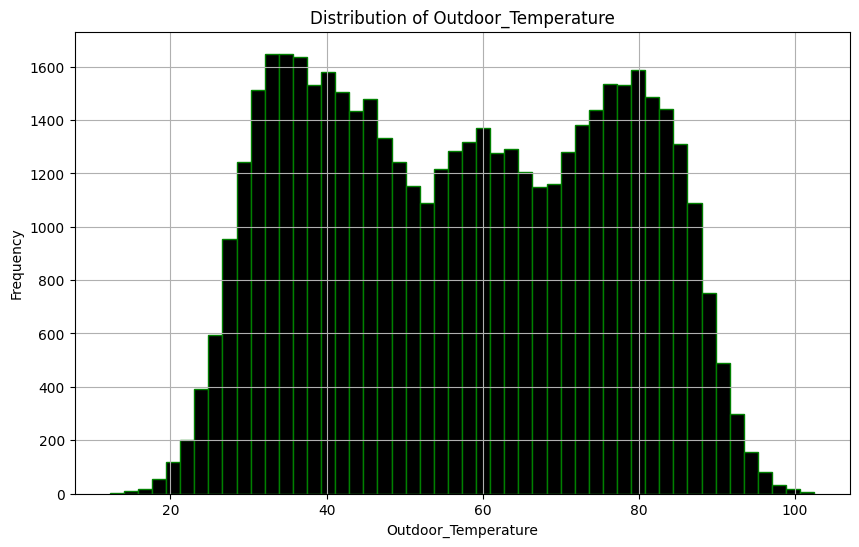

In [28]:
# plotting the histogram of the Outdoor Temperature
plot_histogram(df,'Outdoor_Temperature',edgecolor='green',color='black');

In [29]:
df['Outdoor_Temperature'].describe()

count    49554.000000
mean        57.383271
std         19.296847
min         12.234387
25%         40.213776
50%         57.242070
75%         74.686788
max        102.456885
Name: Outdoor_Temperature, dtype: float64

In [30]:
# the data is approximately normal so we can use median or mean imputation as both are very clsoe to each other 
df['Outdoor_Temperature'].fillna(df['Outdoor_Temperature'].median(), inplace=True)

In [31]:
show_missing_values(df,show_percentage=True);

MISSING VALUES ANALYSIS
                           Missing Count  Missing (%)
Building_ID                            0         0.00
Building_Type                          0         0.00
Square_Footage                         0         0.00
Age_of_Building                        0         0.00
Occupancy_Count                        0         0.00
Date                                   0         0.00
Day_of_Week                            0         0.00
Month                                  0         0.00
Time_of_Day                            0         0.00
Outdoor_Temperature                    0         0.00
HVAC_Usage                             0         0.00
Appliance_Usage                        0         0.00
Holiday_Flag                           0         0.00
Renewable_Energy_%                    73         0.15
Weather_Condition                      0         0.00
Energy_Consumption_kWh                 0         0.00
Anomaly_Flag                           0         0.00
Peak

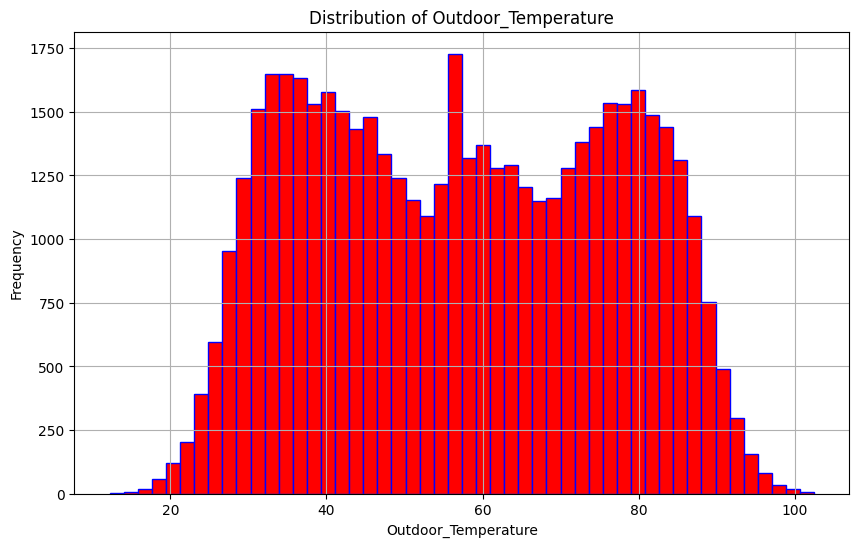

In [33]:
plot_histogram(df, 'Outdoor_Temperature', color="red", edgecolor="blue");

In [34]:
## now focusing on Renewable_Energy_% column
# it has 73 missing values NAN
df['Renewable_Energy_%'].dtype

dtype('float64')

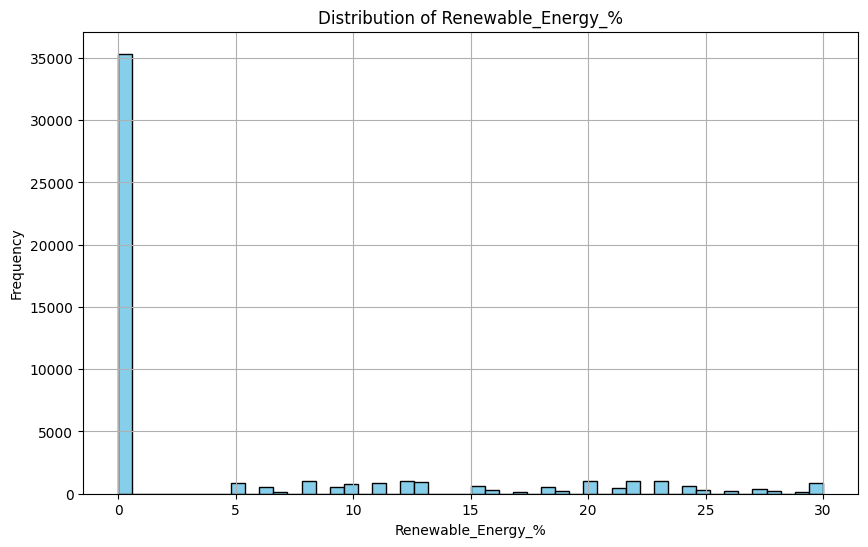

In [35]:
# plotting the histogram of the Renewable Energy Column
plot_histogram(df, 'Renewable_Energy_%');

In [36]:
# this shows that renewable energy is very rarely used in the dataset given 
# finding the values where 0 % renewable energy is present , 
zero_count = (df['Renewable_Energy_%'] == 0).sum()
print(f"Number of 0% renewable energy records: {zero_count}")

Number of 0% renewable energy records: 35338


In [38]:
# we will fill the missing NAN valus with 0 as a very huge portion of this column has value 0 and missing values are most likely telling that there is no renewable energy usage in it
df['Renewable_Energy_%'] = df['Renewable_Energy_%'].fillna(0)

In [39]:
# we will create another column which is a binary feature telling whther a building is using renewable enrgy or not 
df['Has_Renewable'] = (df['Renewable_Energy_%'] > 0).astype(int)
print(df[['Renewable_Energy_%', 'Has_Renewable']].sample(5))

       Renewable_Energy_%  Has_Renewable
34269                21.0              1
24774                 0.0              0
14300                 0.0              0
29905                 0.0              0
40449                 6.0              1


In [40]:
show_missing_values(df)

MISSING VALUES ANALYSIS
                           Missing Count
Building_ID                            0
Building_Type                          0
Square_Footage                         0
Age_of_Building                        0
Occupancy_Count                        0
Date                                   0
Day_of_Week                            0
Month                                  0
Time_of_Day                            0
Outdoor_Temperature                    0
HVAC_Usage                             0
Appliance_Usage                        0
Holiday_Flag                           0
Renewable_Energy_%                     0
Weather_Condition                      0
Energy_Consumption_kWh                 0
Anomaly_Flag                           0
Peak_Usage_Flag                        0
Temp_vs_Consumption_Ratio            446
Building_Size_Category                 0
Has_Renewable                          0

Total rows in dataset: 50000


In [41]:
# Temp_vs_Consumption_Ratio is nothign but the ratio of Energy_Consumption_kWh and Outdoor_Temperature
# we will jsut find the ratio again and now the column will not have nan values

In [43]:
df['Temp_vs_Consumption_Ratio'].dtype

dtype('float64')

In [42]:
df[['Outdoor_Temperature', 'Energy_Consumption_kWh', 'Temp_vs_Consumption_Ratio']].head()

,Outdoor_Temperature,Energy_Consumption_kWh,Temp_vs_Consumption_Ratio
0,79.102869,250.69,3.169164
1,57.242070,89.96,NaN
2,59.906903,87.20,1.455592
3,74.880985,377.27,5.038262
4,35.136324,397.68,11.318202


In [44]:
df['Temp_vs_Consumption_Ratio'] = df['Energy_Consumption_kWh']/ df['Outdoor_Temperature']

In [45]:
df[['Outdoor_Temperature', 'Energy_Consumption_kWh', 'Temp_vs_Consumption_Ratio']].head()

,Outdoor_Temperature,Energy_Consumption_kWh,Temp_vs_Consumption_Ratio
0,79.102869,250.69,3.169164
1,57.242070,89.96,1.571571
2,59.906903,87.20,1.455592
3,74.880985,377.27,5.038262
4,35.136324,397.68,11.318202


In [46]:
show_missing_values(df)

MISSING VALUES ANALYSIS
                           Missing Count
Building_ID                            0
Building_Type                          0
Square_Footage                         0
Age_of_Building                        0
Occupancy_Count                        0
Date                                   0
Day_of_Week                            0
Month                                  0
Time_of_Day                            0
Outdoor_Temperature                    0
HVAC_Usage                             0
Appliance_Usage                        0
Holiday_Flag                           0
Renewable_Energy_%                     0
Weather_Condition                      0
Energy_Consumption_kWh                 0
Anomaly_Flag                           0
Peak_Usage_Flag                        0
Temp_vs_Consumption_Ratio              0
Building_Size_Category                 0
Has_Renewable                          0

Total rows in dataset: 50000


In [47]:
# now there are no missing values in the dataset as we ahve treated all missing values in our dataset 
# we wil also drop the features are not useful for our datset , mainly Building_ID and Anomaly_Flag , 
df.drop(columns=['Building_ID', 'Anomaly_Flag'], inplace=True)

In [48]:
df.columns

Index(['Building_Type', 'Square_Footage', 'Age_of_Building', 'Occupancy_Count',
       'Date', 'Day_of_Week', 'Month', 'Time_of_Day', 'Outdoor_Temperature',
       'HVAC_Usage', 'Appliance_Usage', 'Holiday_Flag', 'Renewable_Energy_%',
       'Weather_Condition', 'Energy_Consumption_kWh', 'Peak_Usage_Flag',
       'Temp_vs_Consumption_Ratio', 'Building_Size_Category', 'Has_Renewable'],
      dtype='object')

In [49]:
# saving this processed df to csv file for further analysis 
df.to_csv('../data/processed/Energy_Consumption_Processed_01_Cleaned.csv', index=False)  # Excludes row indices